<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer-graded Assignment: Build a Regression Model in Keras</font></h1>

# Download and Clean Dataset

Let's start by importing the <em>pandas</em> and the Numpy libraries.

In [ ]:
import pandas as pd
import numpy  as np

We will be playing around with the same dataset that we used in the videos.

<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>

Let's download the data and read it into a <em>pandas</em> dataframe.

In [ ]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa.

#### Let's check how many data points we have.

In [ ]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.

Let's check the dataset for any missing values.

In [ ]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.

Lets separate our data into predictors (X) and target (y)

In [ ]:
target = "Strength"
X = concrete_data.copy()
y = X.pop(target)

In [ ]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [ ]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [ ]:
# number of predictors
n_cols      = X.shape[1]
input_shape = (n_cols,)

# Part A: Build a baseline model (5 marks)

Use the Keras library to build a neural network with the following:
  * One hidden layer of 10 nodes, and a ReLU activation function
  * Use the adam optimizer and the mean squared error as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_split helper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

## Part A.1: Split data into training and test

In [ ]:
# Import the train_test_split of scikit-learn
# Will use it later for the train/test split
from sklearn.model_selection import train_test_split

## Part A.2: Train a regression model

Import the keras package

In [ ]:
from tensorflow import keras as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

### Build a Neural Network

In [ ]:
# define regression model
def regression_model(network_arch,
                     input_shape,
                     optimizer = "adam",
                     loss = "mean_squared_error",
                    ):
    """
    Function to build the regression model

    parameters:
    -----------
      - network_arch: dictionary with the following structure
          {"layer_1": {"u_units": n, "activation": activation},
           ...
           "layer_n": {"u_units"}
          }
      - input_shape: tuple with the shape of the input
      - optimizer:   string, name of the optimizer to use
      - loss:        string, name of the loss function to minimize

    returns:
    --------
      - A compiled model
    """

    # create model
    model = Sequential()

    nlayers     = len(network_arch)
    final_layer = "layer_" + str(nlayers)

    for k,layer in network_arch.items():
        n_units    = layer.get("n_units")
        activation = layer.get("activation")
        if k == "layer_1":
            model.add(Dense(n_units, activation=activation, input_shape=input_shape))
        elif k == final_layer:
            model.add(Dense(n_units))
        else:
            model.add(Dense(n_units, activation=activation))

    # compile model
    model.compile(optimizer=optimizer, loss=loss)

    return model


### Model architecture

Lets define the architecture of the model that we're going to use. In this part we are going to build a model with
* one hidden layer of 10 nodes,
* and a ReLU activation function

In [ ]:
# model architecture
model_architecture1 = {"layer_1": {"n_units": 10, "activation": "relu"},
                       "layer_2": {"n_units":  1},
                      }

print()
print("input_shape    = {}".format(input_shape))
print("network_config = {}".format(model_architecture1))
print()


input_shape    = (8,)
network_config = {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 1}}



## Part A.3: Train and test a regression model several times

Will train and test a model 50 times. Will recollect the performances as mean squared error between the predicted concrete strength and the actual concrete strength.

In [ ]:
# import the metric to evaluate the model performance
from sklearn.metrics import mean_squared_error

In [ ]:
# Define a function for the loops
def train_and_test_several_models(X,y,
                                  test_size,
                                  model_arch,
                                  input_shape,
                                  optimizer,
                                  loss,
                                  niterations,
                                  epochs,
                                  pred_norm = False,
                                  seed = 345,
                                  verbose = 2,
                                 ):
    """
    Function for training and testing several model on random train/test splits

    parameters:
    -----------
      - X,y:         the data. X are the predictors and y the target
      - seed:        int, with a seed to be used in the train/test splitting
      - test_size:   float (0,0.5). Size of the test-sample as a fraction of the whole data-set
      - model_arch:  dict. Architecture of the model (see regression_model above)
      - input_shape: 2-tuple with the input shape
      - optimizer:   string. optimizer name
      - loss:        string. loss function name
      - niterations: int. number of iterations to perform the train/test split, model training and testing
      - epoch:       int. number of epochs for model training
      - pred_norm:   bool. If True will apply normalization on the predictors
      - verbose:     int >= 0. level of verbosity.

    returns:
    --------
      - mse_results: np.array with the sqrt(mse) metric evaluated on the test-samples
    """

    # Array to store the results of the model evaluation on the test set
    metric_list = np.zeros(niterations)

    print()
    print("Launching {} iterations of".format(niterations))
    print(" - train/test split => test_size = {}".format(test_size))
    if pred_norm:
        print(" - Apply predictors normalization")
    else:
        print(" - No    predictors normalization")
    print(" - model architecture: {}".format(model_arch))
    print(" - model training:")
    print("   * epochs    = {}".format(epochs))
    print("   * optimizer = {}".format(optimizer))
    print("   * loss      = {}".format(loss))
    print()

    # Start the loop
    for i in range(niterations):
        # Apply the train test split
        myseed = seed + i*2 # seed used for the train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=myseed)

        # Start by building the model
        model = regression_model(network_arch = model_arch,
                                 input_shape  = input_shape,
                                 optimizer    = optimizer,
                                 loss         = loss)

        if pred_norm:
            # If requested apply predictors normalization
            # first calculate the mean and std on the train-sample
            X_train_mean = X_train.mean()
            X_train_std  = X_train.std()

            # then apply them on both, the train and test samples
            X_train = (X_train - X_train_mean)/X_train_std
            X_test  = (X_test  - X_train_mean)/X_train_std

        myverbose = 0
        if i == 0:
            myverbose = verbose
            print("Train/test splitting for iteration {}".format(i+1))
            print("  X_train.shape = {}".format(X_train.shape))
            print("  y_train.shape = {}".format(y_train.shape))
            print("  X_test.shape  = {}".format(X_test.shape))
            print("  y_test.shape  = {}".format(y_test.shape))
            print(X_train.head())
            print()
            print("Model summary for iteration {}".format(i+1))
            model.summary()
            print()
            print()

        # Model training
        model.fit(X_train, y_train, epochs=epochs, verbose=verbose)

        # model predictions on test sample
        y_pred = model.predict(X_test)

        # Model evaluation on test sample
        result = np.sqrt(mean_squared_error(y_test,y_pred))
        print("{}: sqrt(mse) = {}".format(i+1,result))
        metric_list[i] = result


    print()

    return metric_list


Define some variables to be used in all parts of this asignment

In [ ]:
niterations = 50  # Number of iterations
test_size   = 0.3 # test sample size

We now launch the loop

In [ ]:
sq_mse_list_A = train_and_test_several_models(X = X,
                                              y = y,
                                              test_size   = test_size,
                                              model_arch  = model_architecture1,
                                              input_shape = input_shape,
                                              optimizer   = "adam",
                                              loss        = "mean_squared_error",
                                              niterations = niterations,
                                              epochs      = 50,
                                              seed        = 345,
                                              verbose     = 0,
                                              pred_norm   = False,
                                             )


Launching 50 iterations of
 - train/test split => test_size = 0.3
 - No    predictors normalization
 - model architecture: {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 1}}
 - model training:
   * epochs    = 50
   * optimizer = adam
   * loss      = mean_squared_error

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train/test splitting for iteration 1
  X_train.shape = (721, 8)
  y_train.shape = (721,)
  X_test.shape  = (309, 8)
  y_test.shape  = (309,)
     Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
870   149.0               139.0    109.0  193.0               6.0   
875   155.0               183.0      0.0  193.0               9.0   
488   387.0                20.0     94.0  157.0              14.3   
10    198.6               132.4      0.0  192.0               0.0   
391   397.0                17.2    158.0  167.0              20.8   

     Coarse Aggregate  F

## Part A results

In [ ]:
# Calculate the mean and the standard deviation of the metric on the 50 samplings
mean_sqmse_A = np.mean(sq_mse_list_A)
std_sqmse_A  = np.std(sq_mse_list_A)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["A"],"mean_sq_mse": [mean_sqmse_A], "std_sq_mse": [std_sqmse_A]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,15.397998,6.797415


Define a function for plotting the resutls

In [ ]:
# Define some common parameters for plotting
figsize = (10,8)
nbins   = 20

Define a function for visualizing and comparing the results of the different parts for this project

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_results(result_list,
                 label_list,
                 var_name = "sq(mse)",
                 figsize = (15,10),
                 nbins = 10):
    """
    plotting function

    parameters:
    -----------
      - result_list: list of np.arrays with the metrics of the niterations
      - label_list:  list of labels
    """

    if len(result_list) != len(label_list):
        raise ValueError("lenghts of result_list and label_list has to be the same")

    if len(result_list) == 0:
        raise ValueError("lenght of result_list has to be > 0")

    color_list = ["b","r","m","y"]

    xmin = +1.0e+20
    xmax = -1.0e+20
    for arr in result_list:
        min_tmp = np.amin(arr)
        max_tmp = np.amax(arr)

        if xmin > min_tmp:
            xmin = min_tmp
        if xmax < max_tmp:
            xmax = max_tmp

    percent   = 0.01
    delta     = xmax - xmin
    xmin     -= percent*delta
    xmax     += percent*delta

    bins = np.linspace(xmin, xmax, nbins+1)


    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)

    porcent = 0.05
    ymax = -1.0e+20
    for i,arr in enumerate(result_list):
        n,_,_ = ax.hist(x       = arr,
                        bins    = bins,
                        color   = color_list[i],
                        alpha   = 0.5,
                        density = False,
                        label   = label_list[i]
                       )

        if ymax < np.amax(n):
            ymax = np.amax(n)


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.legend()
    ax.set_xlim([bins[0],bins[-1]])
    ax.set_ylim([0,ymax*(1.0 + porcent)])
    ax.set_xlabel(var_name)
    ax.set_ylabel('Occurences')
    ax.set_title(var_name + ' distribution')

    fig.tight_layout()

    plt.show()


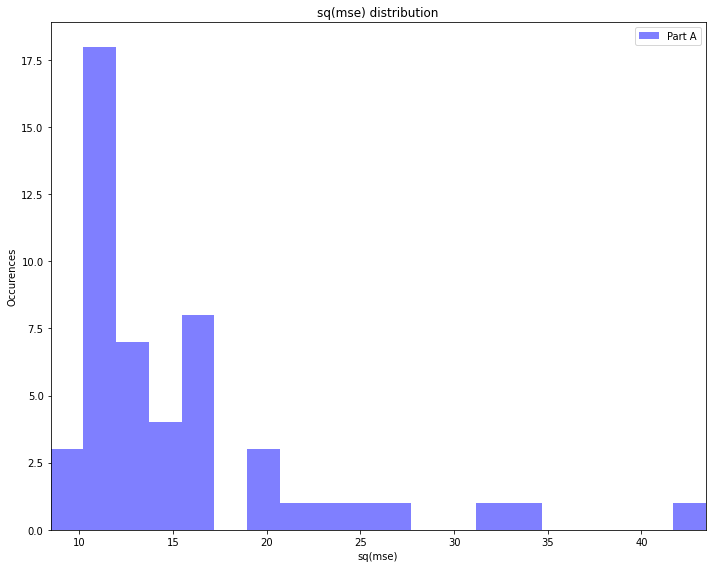

In [ ]:
plot_results(result_list = [sq_mse_list_A],
             label_list  = ["Part A"],
             var_name = "sq(mse)",
             figsize = figsize,
             nbins = nbins)

# Part B: Normalize the data (5 marks)

Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

How does the mean of the mean squared errors compare to that from Step A?

In [ ]:
# Just launch the function above (train_and_test_several_models), but with pred_norm = True
sq_mse_list_B = train_and_test_several_models(X = X,
                                              y = y,
                                              test_size   = test_size,
                                              model_arch  = model_architecture1,
                                              input_shape = input_shape,
                                              optimizer   = "adam",
                                              loss        = "mean_squared_error",
                                              niterations = niterations,
                                              epochs      = 50,
                                              seed        = 3675,
                                              verbose     = 0,
                                              pred_norm   = True,
                                             )


Launching 50 iterations of
 - train/test split => test_size = 0.3
 - Apply predictors normalization
 - model architecture: {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 1}}
 - model training:
   * epochs    = 50
   * optimizer = adam
   * loss      = mean_squared_error

Train/test splitting for iteration 1
  X_train.shape = (721, 8)
  y_train.shape = (721,)
  X_test.shape  = (309, 8)
  y_test.shape  = (309,)
       Cement  Blast Furnace Slag   Fly Ash     Water  Superplasticizer  \
723  0.260617           -0.863998 -0.825639  0.448707         -1.007613   
112  1.477748            1.174001 -0.825639  0.163870          0.870100   
278 -0.292281           -0.863998  1.058232  0.282552         -0.026465   
641 -0.305490           -0.863998 -0.825639 -0.026021         -1.007613   
270 -0.477209           -0.863998  1.110782 -0.405804          0.125781   

     Coarse Aggregate  Fine Aggregate       Age  
723          0.481434        0.718580 -0.271735  
112     

In [ ]:
# Calculate the mean and the standard deviation of the metric on the 50 samplings
mean_sqmse_B = np.mean(sq_mse_list_B)
std_sqmse_B  = np.std(sq_mse_list_B)

df_results.loc[df_results.shape[0]] = ["B",mean_sqmse_B,std_sqmse_B]
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,15.397998,6.797415
1,B,18.283187,2.140109


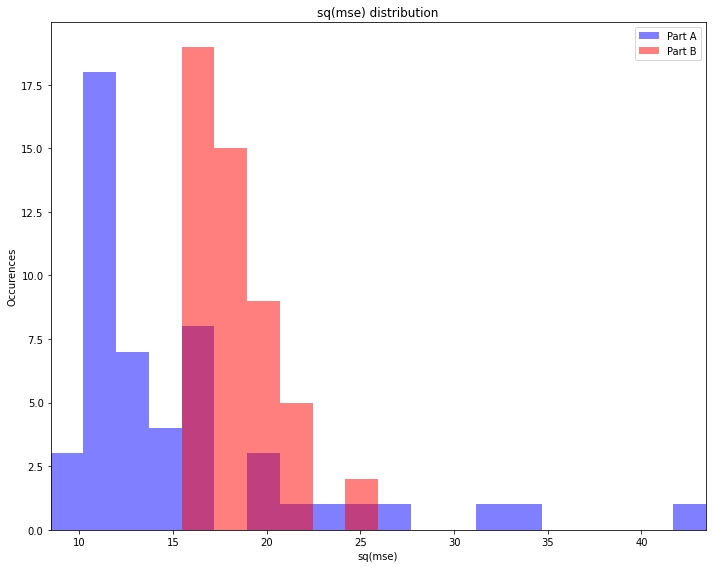

In [ ]:
plot_results(result_list = [sq_mse_list_A,sq_mse_list_B],
             label_list  = ["Part A","Part B"],
             var_name = "sq(mse)",
             figsize = figsize,
             nbins = nbins)

## How does the mean of the mean squared errors compare to that from Step A?

It seems that by rormalizing the predictors we increase the mean value of the mse we obtain, but significantly decrease it standard deviation